# HOUGH LINE AND CIRCLE DETECTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2
%matplotlib inline

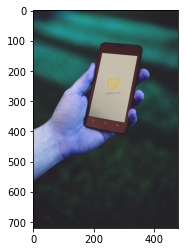

In [12]:
image = cv2.imread('phone.jpg')
plt.imshow(image)

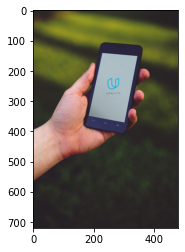

In [13]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Perform Edge Detection

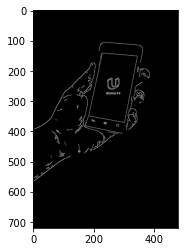

In [16]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
upper = 100
lower = 50 
edges = cv2.Canny(gray,lower,upper)
plt.imshow(edges,cmap = 'gray')

### Find Lines Using Hough Lines (open cv function HoughLinesP)

#### Defining Hough Transform Parameters(we are using probabilistic Hough Transform)

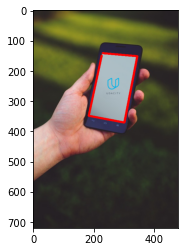

In [20]:
rho = 1
thetha = np.pi/180
threshold = 60
min_line_length = 100
min_line_gap = 5

#find lines using hough lines
lines = cv2.HoughLinesP(edges,rho,thetha,threshold,np.array([]),min_line_length,min_line_gap)

line_image = np.copy(image_copy)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)


## Hough Circles Detection

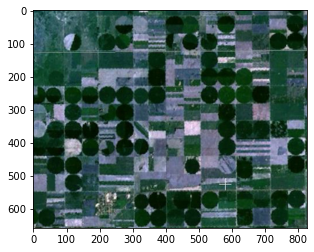

In [21]:
image_1 = cv2.imread("round_farms.jpg")
plt.imshow(image_1)

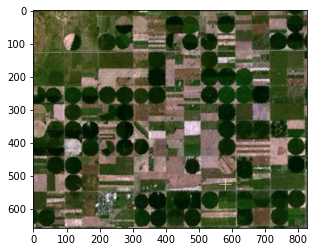

In [22]:
image_farm = np.copy(image_1)
image_farm = cv2.cvtColor(image_farm,cv2.COLOR_BGR2RGB)
plt.imshow(image_farm)

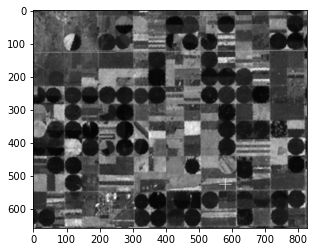

In [26]:
gray_1 = cv2.cvtColor(image_farm,cv2.COLOR_RGB2GRAY)
upper_1 = 100
lower_1 = 50 
edges_1 = cv2.Canny(gray_1,lower_1,upper_1)
edges_1 = cv2.GaussianBlur(gray_1, (3, 3), 0)
plt.imshow(edges_1,cmap = 'gray')

Circles shape:  (1, 84, 3)


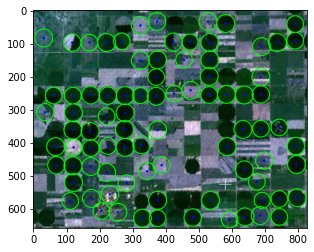

In [28]:
circles_im = np.copy(image_1)

circles = cv2.HoughCircles(gray_1, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=23,
                           maxRadius=28)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)